In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import koreanize_matplotlib


In [3]:
df = pd.read_excel(r'C:\Users\kdp\Desktop\KDW\EX_Numpy\DAY03\상품_인구통계_2024-01-01_2024-06-30.xlsx')
df = df[['상품명', '성별', '나이', '환불금액', '환불건수', '환불수량']]

bins = [10, 20, 30, 40, 50, 60, 70, 100]
labels = ['10대', '20대', '30대', '40대', '50대', '60대', '70대 이상']

df['연령'] = pd.cut(df['나이'].str.extract('(\d+)', expand=False).astype(int), bins=bins, labels=labels, right=False)
df

,상품명,성별,나이,환불금액,환불건수,환불수량,연령
0,종근당건강 칼슘 앤 마그네슘 비타민D 아연,남성,36~40,80000,4,5,30대
1,종근당건강 칼슘 앤 마그네슘 비타민D 아연,남성,31~35,46300,3,3,30대
2,종근당건강 칼슘 앤 마그네슘 비타민D 아연,여성,51~55,77000,5,5,50대
3,종근당건강 칼슘 앤 마그네슘 비타민D 아연,남성,51~55,15000,1,1,50대
4,종근당건강 칼슘 앤 마그네슘 비타민D 아연,여성,41~45,60400,3,4,40대
...,...,...,...,...,...,...,...
812,닥터린 초임계 알티지 오메가3,여성,71+,0,0,0,70대 이상
813,GNM자연의품격 종합비타민 미네랄15,여성,46~50,0,0,0,40대
814,GNM자연의품격 건강한 간 밀크씨슬,여성,36~40,0,0,0,30대
815,GNM자연의품격 건강한 간 밀크씨슬,남성,51~55,0,0,0,50대


In [4]:
df1=df[['성별','환불건수','연령']]
df1

,성별,환불건수,연령
0,남성,4,30대
1,남성,3,30대
2,여성,5,50대
3,남성,1,50대
4,여성,3,40대
...,...,...,...
812,여성,0,70대 이상
813,여성,0,40대
814,여성,0,30대
815,남성,0,50대


In [5]:
dfM = df[df['성별'] == '남성']
dfM = dfM[['환불건수', '환불수량', '연령']]
dfM = dfM.groupby('연령').sum().sort_index()

dfW = df[df['성별'] == '여성']
dfW = dfW[['환불건수', '환불수량', '연령']]
dfW = dfW.groupby('연령').sum().sort_index()

dfM

C:\Users\kdp\AppData\Local\Temp\ipykernel_1260\3891406225.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfM = dfM.groupby('연령').sum().sort_index()
C:\Users\kdp\AppData\Local\Temp\ipykernel_1260\3891406225.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfW = dfW.groupby('연령').sum().sort_index()


,환불건수,환불수량
연령,,
10대,1,2
20대,23,70
30대,42,71
40대,34,52
50대,24,48
60대,7,14
70대 이상,4,15


C:\Users\kdp\AppData\Local\Temp\ipykernel_1260\3303754428.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df1.groupby(['연령', '성별'])['환불건수'].sum().unstack()


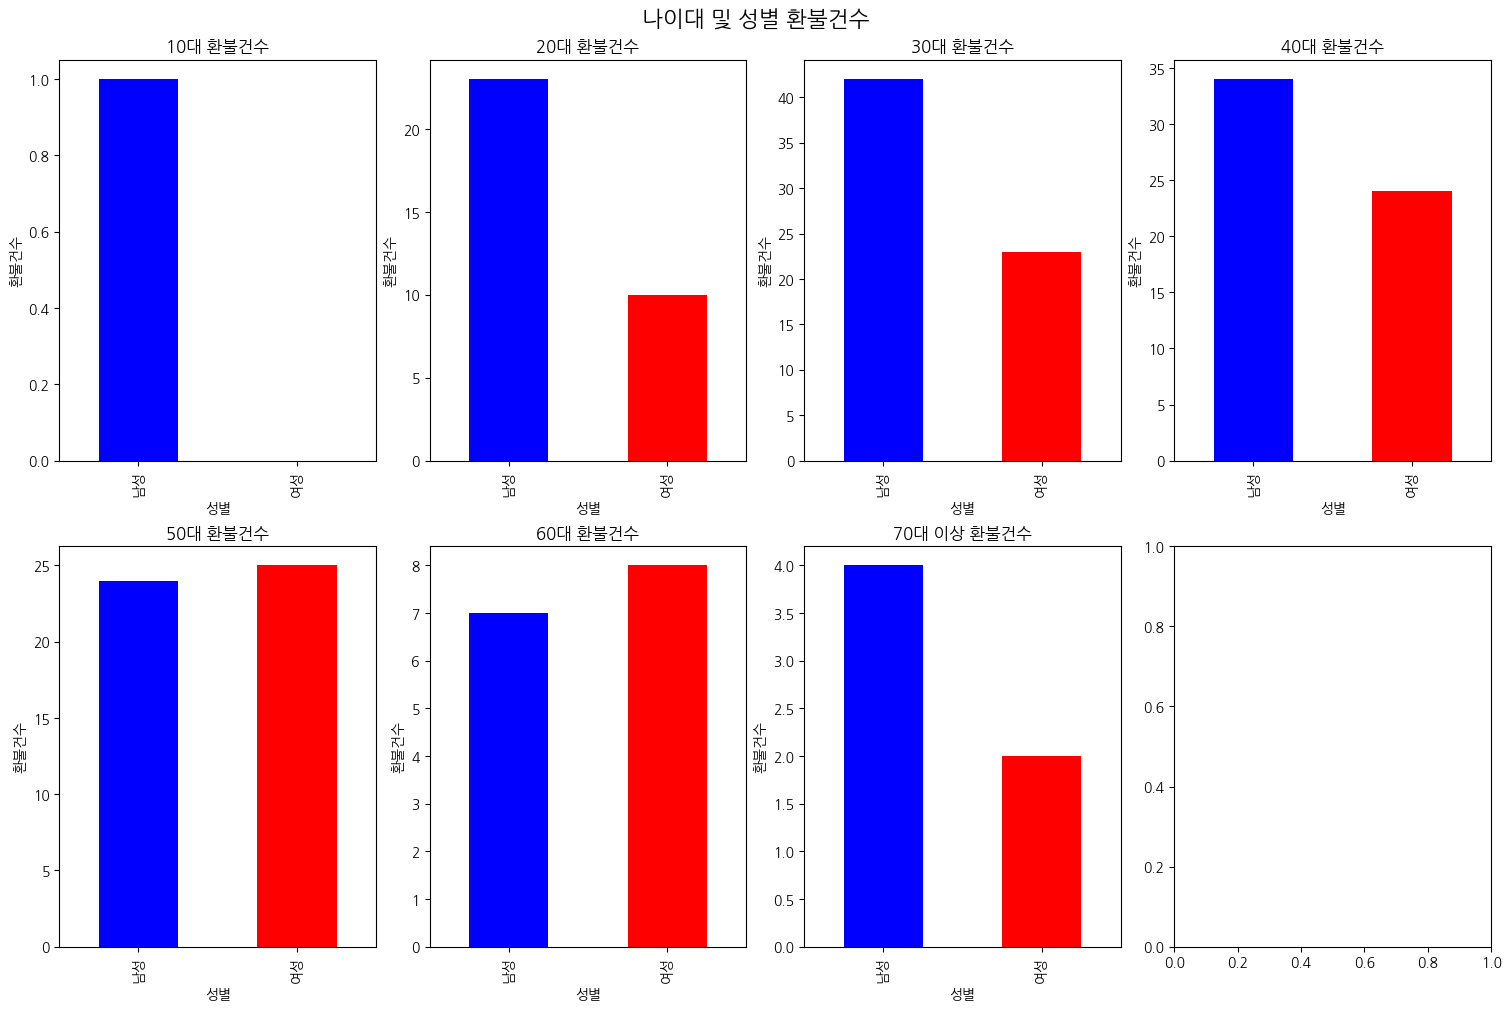

In [6]:
grouped = df1.groupby(['연령', '성별'])['환불건수'].sum().unstack()

fig, axes = plt.subplots(2, 4, figsize=(15, 10), constrained_layout=True)

for i, (연령, data) in enumerate(grouped.iterrows()):
    row = i // 4
    col = i % 4
    data.plot(kind='bar', ax=axes[row, col], title=f'{연령} 환불건수',
              color=['blue' if 성별 == '남성' else 'red' for 성별 in data.index])
    axes[row, col].set_xlabel('성별')
    axes[row, col].set_ylabel('환불건수')
    
plt.suptitle('나이대 및 성별 환불건수', fontsize=16)
plt.show()


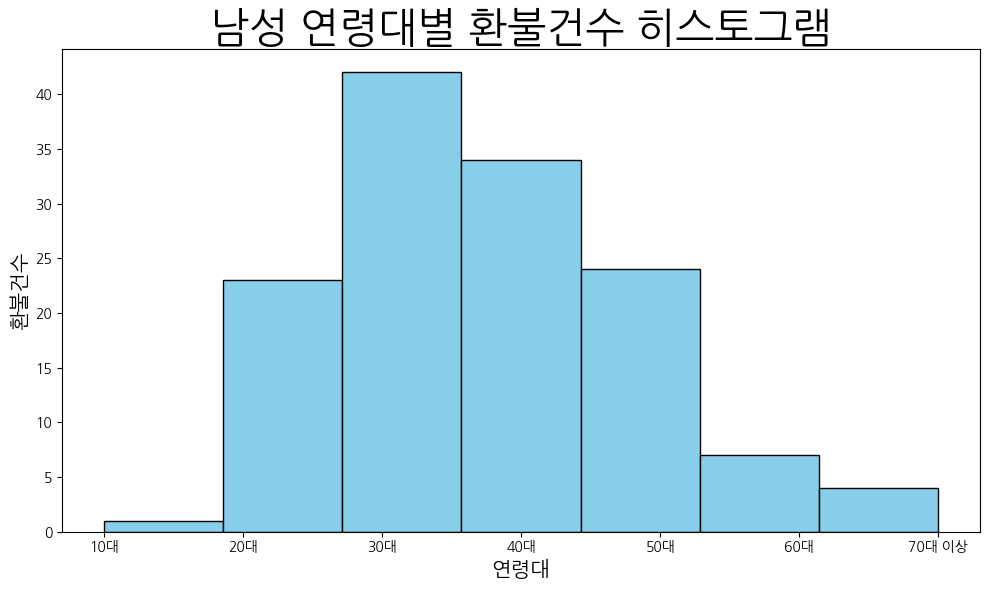

In [14]:
plt.figure(figsize=(10, 6))


plt.hist(dfM.index, bins=len(dfM.index), weights=dfM['환불건수'], 
         edgecolor='black', color='skyblue')

plt.title('남성 연령대별 환불건수 히스토그램', size=30)
plt.xlabel('연령대', size=15)
plt.ylabel('환불건수', size=15)


plt.xticks(ticks=np.arange(len(dfM.index)), labels=dfM.index)

plt.show()

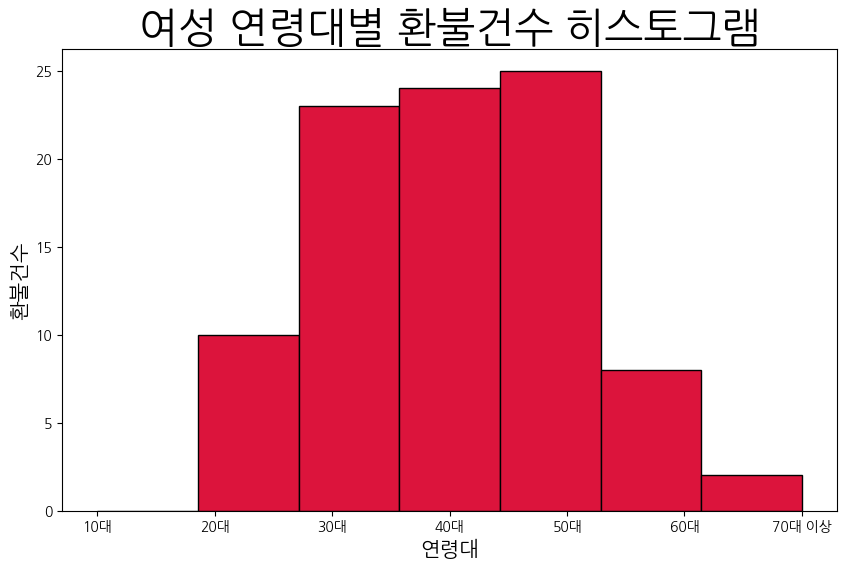

In [13]:
plt.figure(figsize=(10,6))


plt.hist(dfW.index, bins=len(dfM.index), weights=dfW['환불건수'], 
         edgecolor='black', color='crimson')

plt.title('여성 연령대별 환불건수 히스토그램', size=30)
plt.xlabel('연령대', size=15)
plt.ylabel('환불건수', size=15)


plt.xticks(ticks=np.arange(len(dfW.index)), labels=dfW.index)
plt.savefig('transparent_pie_chart.png', transparent=True)

plt.show()